In [54]:
import pandas as pd
from tqdm.auto import tqdm

# Load the housing data
housing_data = pd.read_csv('housing.csv')

# Show the head of the dataframe
housing_data_head = housing_data.head()

# Display the head of the dataframe
print(housing_data_head)

   Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story        Average        1960   
1            80     11622    OneFam   One_Story  Above_Average        1961   
2            81     14267    OneFam   One_Story  Above_Average        1958   
3            93     11160    OneFam   One_Story        Average        1968   
4            74     13830    OneFam   Two_Story        Average        1997   

  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0    Typical           1080          1656              0          1   
1    Typical            882           896              0          1   
2    Typical           1329          1329              0          1   
3    Typical           2110          2110              0          2   
4    Typical            928           928            701          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0            

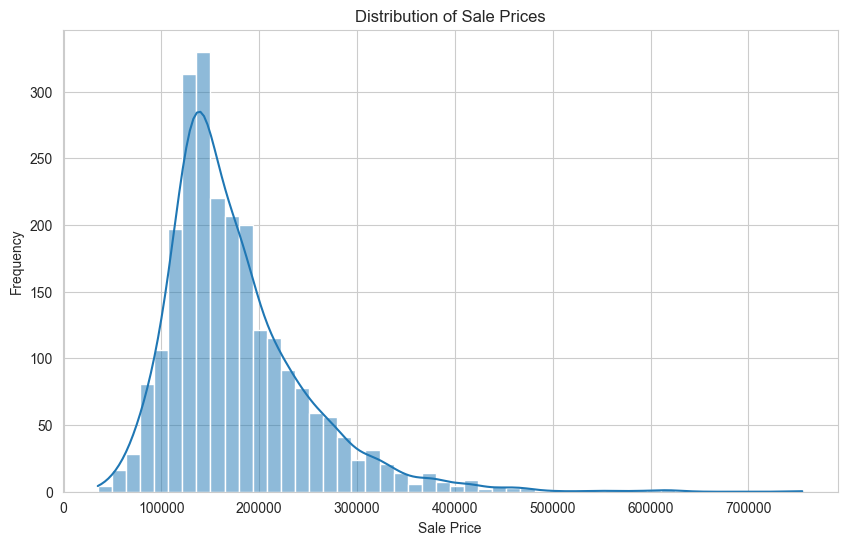

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot distribution of Sale Prices
plt.figure(figsize=(10, 6))
plot = sns.histplot(housing_data['Sale_Price'], bins=50, kde=True)
plot.set_title('Distribution of Sale Prices')
plot.set_xlabel('Sale Price')
plot.set_ylabel('Frequency')

# Show the plot
plt.show()

In [56]:
from tqdm.auto import tqdm

# Set tqdm to pandas to show progress
pd.options.mode.chained_assignment = None  # default='warn'
tqdm.pandas()

# Descriptive statistics for all variables
statistics = housing_data.describe().progress_apply(lambda x: round(x, 2))

# Levels of measurement
levels_of_measurement = {
    'Nominal': ['Bldg_Type', 'House_Style', 'Exter_Cond'],
    'Ordinal': ['Overall_Cond'],
    'Interval': [],
    'Ratio': ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']
}

# Print the descriptive statistics
print('Descriptive Statistics:\n', statistics)

# Print the levels of measurement
print('\nLevels of Measurement:')
for level, vars in levels_of_measurement.items():
    print(f'{level}: {vars}')

100%|██████████| 14/14 [00:00<00:00, 15236.18it/s]

Descriptive Statistics:
        Lot_Frontage   Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
count       2413.00    2413.00     2413.00        2413.00       2413.00   
mean          55.46   10060.21     1969.44        1022.83       1133.86   
std           33.54    8222.76       29.49         408.98        366.44   
min            0.00    1300.00     1872.00           0.00        334.00   
25%           37.00    7390.00     1953.00         784.00        866.00   
50%           60.00    9360.00     1971.00         970.00       1060.00   
75%           77.00   11404.00     1998.00        1246.00       1350.00   
max          313.00  215245.00     2010.00        3206.00       3820.00   

       Second_Flr_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
count        2413.00    2413.00    2413.00        2413.00        2413.00   
mean          339.24       1.54       0.38           2.85           1.04   
std           423.20       0.54       0.50           0.81           0.2

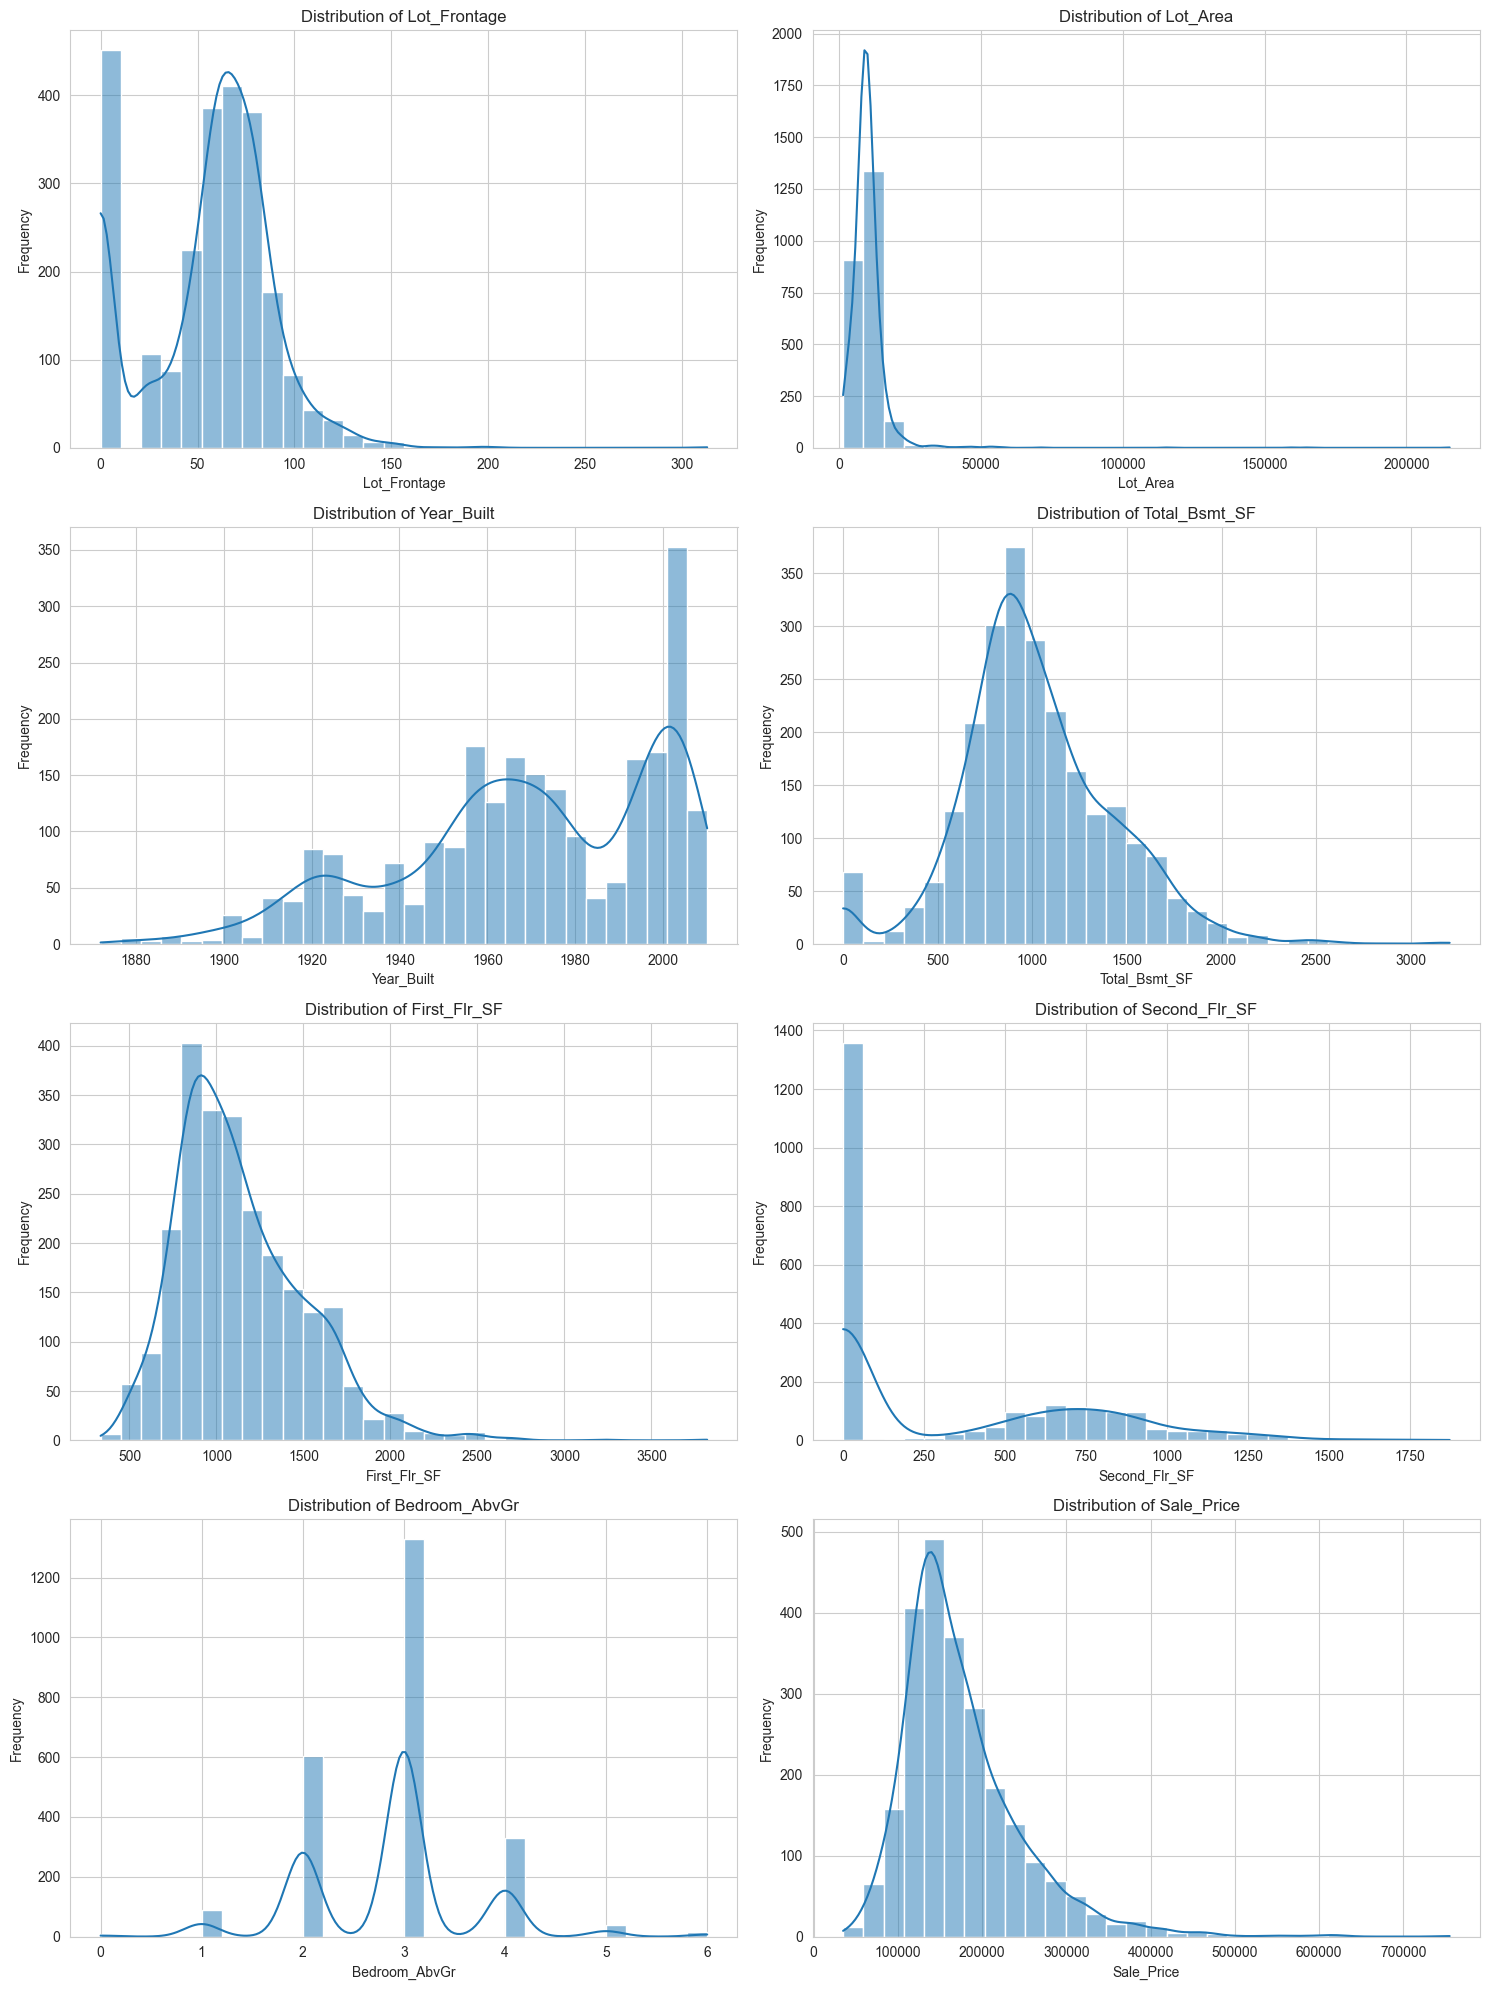

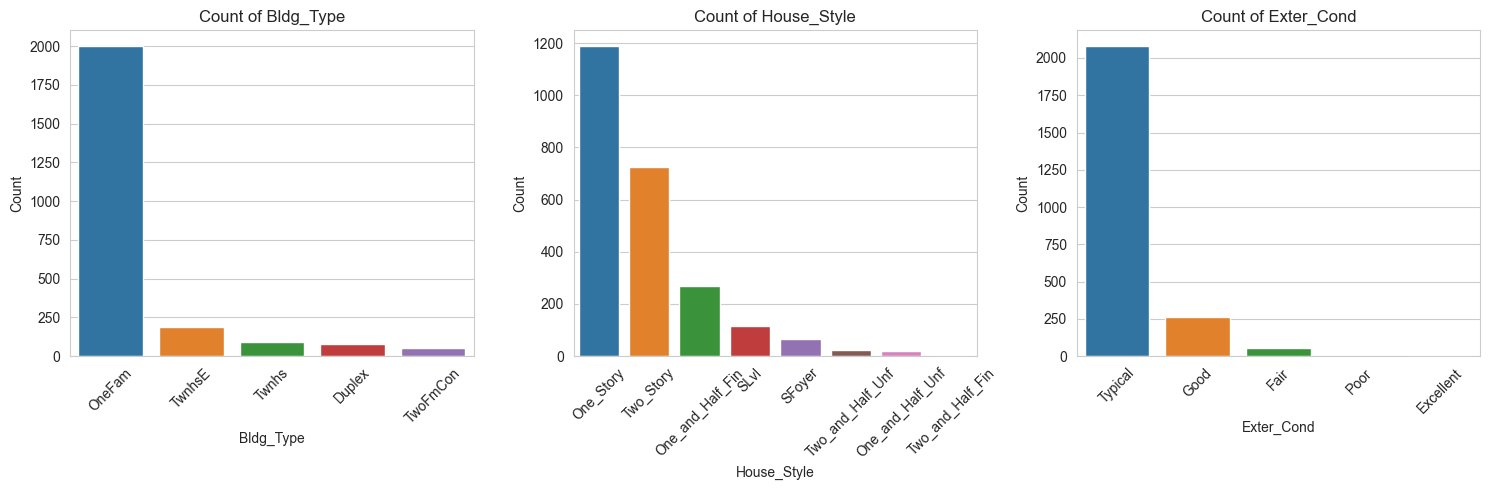

In [57]:
# Visualizations for key variables

# Plotting the distribution of numerical features
numerical_features = ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Bedroom_AbvGr', 'Sale_Price']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.histplot(housing_data[feature], ax=axs[row, col], kde=True, bins=30)
    axs[row, col].set_title('Distribution of ' + feature)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting the count of categorical features
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
categorical_features = ['Bldg_Type', 'House_Style', 'Exter_Cond']

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=housing_data, ax=axs[i])
    axs[i].set_title('Count of ' + feature)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [58]:
# Checking for missing values in the dataset
missing_values = housing_data.isnull().sum().progress_apply(lambda x: x)
missing_values = missing_values[missing_values > 0]
print(missing_values)

100%|██████████| 18/18 [00:00<00:00, 75573.05it/s]

Series([], dtype: int64)


In [59]:
# Checking for correlation among numerical variables
numerical_variables = housing_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = housing_data[numerical_variables].corr().progress_apply(lambda x: round(x, 2))

# Display the correlation matrix
print('Correlation matrix:')
correlation_matrix

100%|██████████| 14/14 [00:00<00:00, 14183.64it/s]

Correlation matrix:


,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
Lot_Frontage,1.00,0.11,-0.03,0.14,0.20,-0.02,0.05,-0.04,0.11,0.02,0.03,-0.00,0.03,0.16
Lot_Area,0.11,1.00,0.01,0.21,0.31,0.02,0.12,0.01,0.14,-0.01,0.24,-0.10,-0.05,0.28
Year_Built,-0.03,0.01,1.00,0.38,0.27,0.02,0.44,0.27,-0.04,-0.14,0.16,-0.42,0.21,0.53
Total_Bsmt_SF,0.14,0.21,0.38,1.00,0.77,-0.22,0.32,-0.09,0.09,-0.03,0.31,-0.15,0.16,0.64
First_Flr_SF,0.20,0.31,0.27,0.77,1.00,-0.27,0.37,-0.14,0.14,0.08,0.40,-0.12,0.13,0.63
Second_Flr_SF,-0.02,0.02,0.02,-0.22,-0.27,1.00,0.42,0.63,0.51,0.08,0.18,-0.06,0.09,0.29
Full_Bath,0.05,0.12,0.44,0.32,0.37,0.42,1.00,0.18,0.38,0.20,0.24,-0.23,0.19,0.55
Half_Bath,-0.04,0.01,0.27,-0.09,-0.14,0.63,0.18,1.00,0.27,-0.04,0.19,-0.11,0.15,0.29
Bedroom_AbvGr,0.11,0.14,-0.04,0.09,0.14,0.51,0.38,0.27,1.00,0.24,0.10,-0.03,0.02,0.18
Kitchen_AbvGr,0.02,-0.01,-0.14,-0.03,0.08,0.08,0.20,-0.04,0.24,1.00,-0.11,0.08,-0.05,-0.11


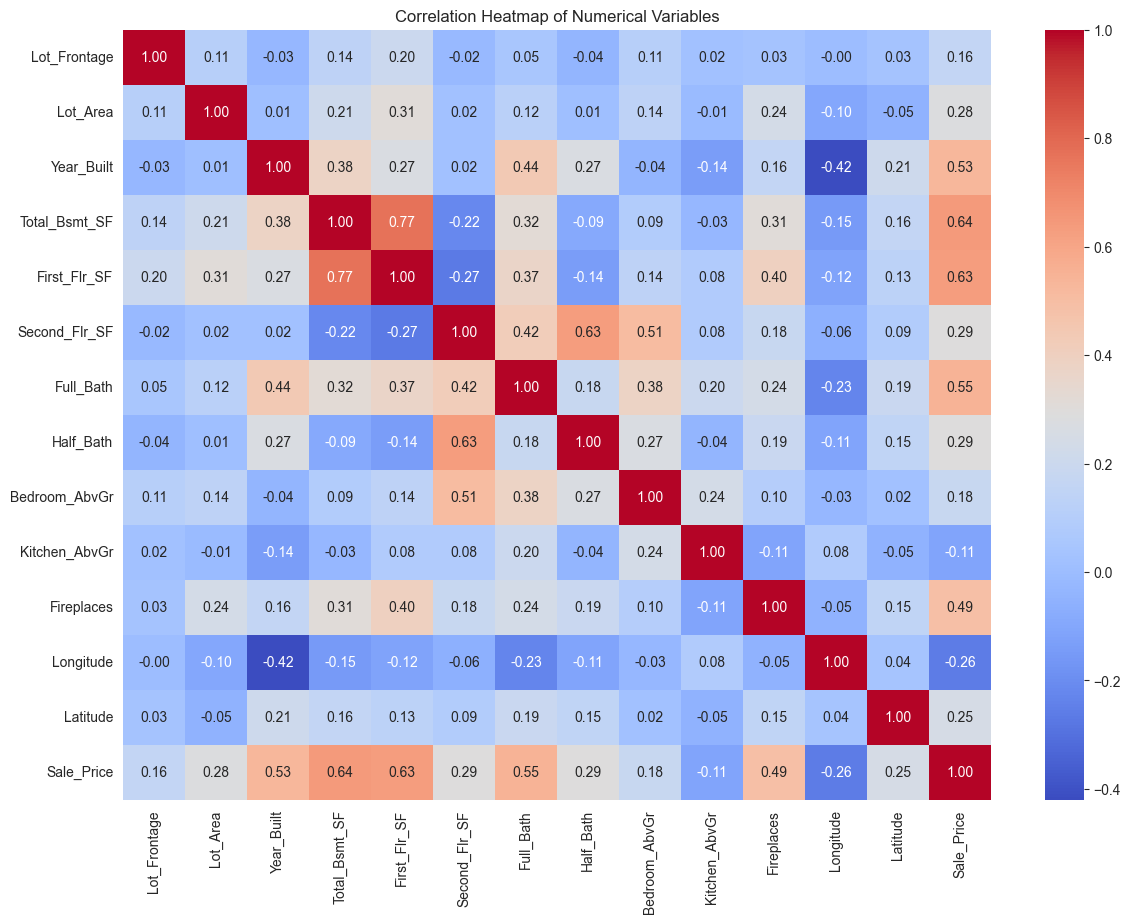

In [60]:
# Generating a heatmap for the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [70]:
# Calculate the number of outliers removed based on the Z-score threshold
outliers_count = combined_data.shape[0] - cleaned_data.shape[0]
print('Number of outliers removed:', outliers_count)

Number of outliers removed: 727


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np

# One-hot encoding the categorical variables
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['Bldg_Type', 'House_Style', 'Exter_Cond']
categorical_data = encoder.fit_transform(housing_data[categorical_columns])
categorical_data = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the numerical and encoded categorical data
numerical_data = housing_data.select_dtypes(include=['int64', 'float64'])
combined_data = pd.concat([numerical_data, categorical_data], axis=1)

# Removing outliers using Z-score
z_scores = np.abs(stats.zscore(combined_data))
filtered_entries = (z_scores < 3).all(axis=1)
cleaned_data = combined_data[filtered_entries]

# Splitting the dataset into train and test sets
X = cleaned_data.drop('Sale_Price', axis=1)
y = cleaned_data['Sale_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22211420)

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting on test set
y_pred = regressor.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Output the head of the train and test sets
print('Train set head:')
print(X_train.head())
print('\nTest set head:')
print(X_test.head())

# Output the MSE
print('\nMean Squared Error of the model:', mse)

Train set head:
      Lot_Frontage  Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
574             52      9022        1924            768           792   
641             50      6000        1937            698           786   
1744            86      8665        1968            876           897   
2302           118     13704        2001           1541          1541   
771             75      9937        1964           1486          1486   

      Second_Flr_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  ...  \
574               0          1          0              2              1  ...   
641             390          1          0              2              1  ...   
1744              0          1          0              3              1  ...   
2302              0          2          0              3              1  ...   
771               0          1          0              3              1  ...   

      House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Stor

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [62]:
# Calculate the number of outliers removed based on the Z-score threshold
outliers_count = combined_data.shape[0] - cleaned_data.shape[0]
print('Number of outliers removed:', outliers_count)

Number of outliers removed: 727


In [63]:
import statsmodels.api as sm

# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the regression model using OLS
model = sm.OLS(y_train, X_train_sm).fit()

# Get the summary of the regression
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     447.9
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:30:16   Log-Likelihood:                -15584.
No. Observations:                1348   AIC:                         3.120e+04
Df Residuals:                    1332   BIC:                         3.128e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Lot_Frontage    

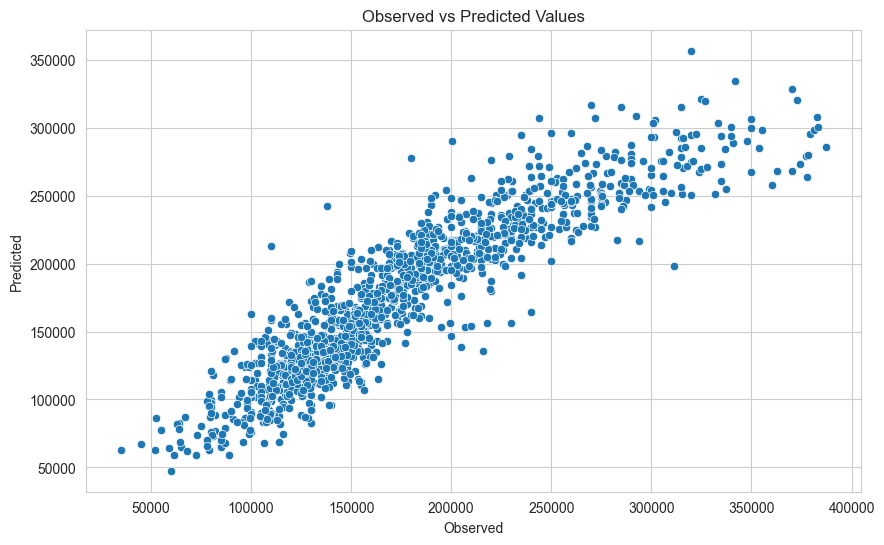

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the values using the model
predictions = model.predict(X_train_sm)

# Plotting the observed vs predicted values
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train, y=predictions)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values')
plt.show()

In [65]:
# Calculate the residuals
residuals = y_train - predictions

# Perform the Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

# The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals
# Therefore, for r = 0, indicating no serial correlation, the test statistic equals 2
# The closer to 2, the better

# Run Durbin-Watson test
dw_statistic = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw_statistic)

Durbin-Watson statistic: 1.9244935275823345


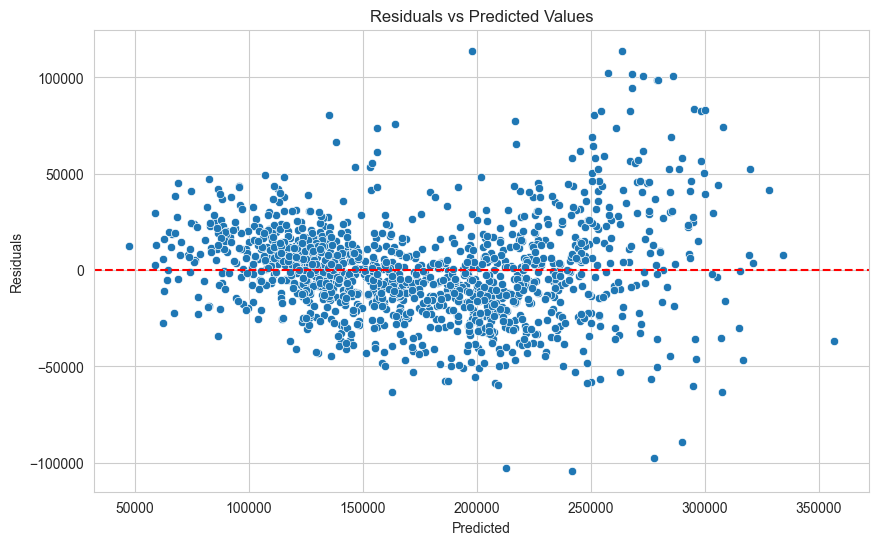

In [66]:
# Plotting the residuals vs fitted values
plt.figure(figsize=(10,6))
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()

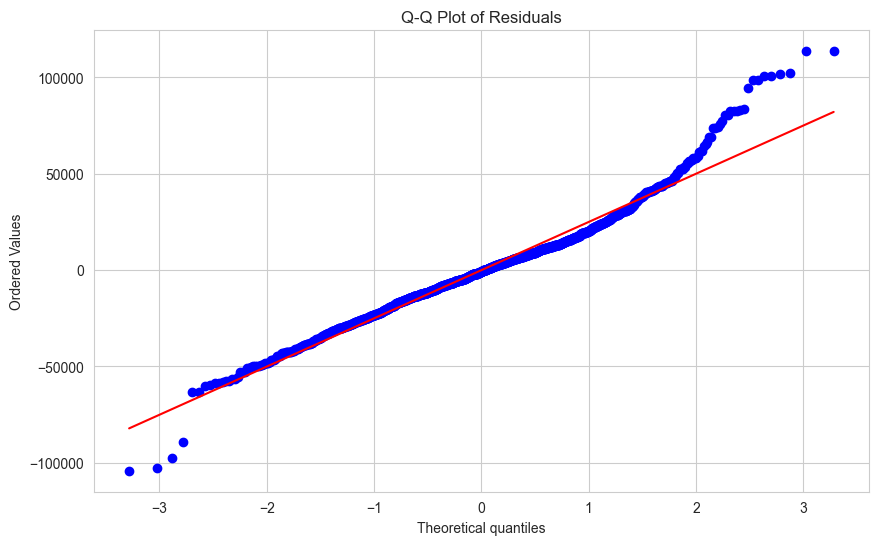

Shapiro-Wilk test: ShapiroResult(statistic=0.9677253365516663, pvalue=9.066880218915426e-17)


In [67]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(10,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test:', shapiro_test)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the VIF data
vif_data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Lot_Frontage,1.022152
1,Lot_Area,1.310941
2,Year_Built,2.920549
3,Total_Bsmt_SF,3.438181
4,First_Flr_SF,4.587024
5,Second_Flr_SF,11.467052
6,Full_Bath,2.986365
7,Half_Bath,2.456453
8,Bedroom_AbvGr,1.581544
9,Kitchen_AbvGr,0.000000


In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'X_test' and 'y_test' are the features and target variable for the test set
# and 'model' is the trained model from the previous steps

# Predict the target variable using the test dataset
y_pred_test = model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

# Print the performance metrics
print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

R-squared: 0.8316010071981929
Mean Absolute Error: 19080.469987790897
Mean Squared Error: 681297363.4876851
Root Mean Squared Error: 26101.673576376
